Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-данные" data-toc-modified-id="Изучим-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучим данные</a></span></li><li><span><a href="#Проведем-преодобработку" data-toc-modified-id="Проведем-преодобработку-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проведем преодобработку</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Linear-Regresssion" data-toc-modified-id="Linear-Regresssion-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regresssion</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ridge</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

Данные находятся в файле /datasets/autos.csv.   
   
**Признаки**   
DateCrawled — дата скачивания анкеты из базы   
VehicleType — тип автомобильного кузова   
RegistrationYear — год регистрации автомобиля   
Gearbox — тип коробки передач   
Power — мощность (л. с.)    
Model — модель автомобиля   
Kilometer — пробег (км)   
RegistrationMonth — месяц регистрации автомобиля   
FuelType — тип топлива   
Brand — марка автомобиля   
NotRepaired — была машина в ремонте или нет   
DateCreated — дата создания анкеты   
NumberOfPictures — количество фотографий автомобиля   
PostalCode — почтовый индекс владельца анкеты (пользователя)   
LastSeen — дата последней активности пользователя   
   
**Целевой признак**   
Price — цена (евро)   

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Родион, твоя работа требует правок, пожалуйста сделай их на основе моих комментариев)Всегда рад ответить на твои вопросы и помочь)Ну и конечно не стоит расстраиваться, не ошибается тот, кто ничего не делает)
</div>

## Подготовка данных

In [ ]:
#!pip install seaborn>=0.11 -U

In [ ]:
#
import pandas as pd
#
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("precision", 3)
#
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

sns.set_style('darkgrid')
#
import numpy as np
from datetime import datetime
from scipy import stats as st
#
#
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
pd.options.mode.chained_assignment = None
#
from lightgbm import LGBMRegressor
#
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.dummy import DummyClassifier, DummyRegressor
#
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, \
                            f1_score, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error, \
                            make_scorer
#
from sklearn.utils import shuffle
#
from IPython.display import display, HTML, display_html
#
import copy

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Я бы рекомендовал не оставлять подобные комментарии при загрузки библиотеку, здесь все стандартные)
</div>

<div class="alert alert-block alert-info">Комментарии я оставляю в первую очередь для себя. Так как копирую потом типовые блоки из проекта в проект</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Оставлять для себя можно на домашнем компьютере)Здесь мы тренируемся делать проекты/отчеты в нужном виде, чтобы все понимали что это за вид сделаны правила, их можно почитать в ноушине)
</div>

### Изучим данные

In [ ]:
%%time

#откроем датасет
#преобразуем колонки c датой и временем к DateTime сразу при открытии
dates_columns = ['DateCrawled','DateCreated','LastSeen']
df = pd.read_csv('/datasets/autos.csv', parse_dates=dates_columns)
df.name = 'autos'

print('Таблица',df.name)
#столбцы к нижнему регистру
df.columns = df.columns.str.lower()
#
display(df.head(5))
display('Размерность данных:', df.shape)
display('Типы:', df.dtypes)

Даты преобразованы сразу при открытии данных. Остальные типы корректны. Присутствуют неифномативные для моделирования колонки 'postalcode', 'lastseen', 'numberofpictures'. Идет дублирование дат. Оценим количество пустых значений в колонках

In [ ]:
#посмотрим диапазоны значений по полям
print(df.name, ' describe ')
display(df.describe())

В столбце RegistrationYear существуют некорректные значения года регистрации.
В столбце RegistrationMonth отсутсвует месяц регистрации.
В столбце Power присутвует некорректное значение мощности.

In [ ]:
def na_persentage(dat):
    print('Доля нулевых значений:')
    gaps_in_the_data = (pd
                        .DataFrame({'percent_of_nulls':dat.isna().sum()/len(dat)})
                        .sort_values(by='percent_of_nulls', ascending=False)
                       )
    gaps_in_the_data['percent_of_nulls'] = gaps_in_the_data['percent_of_nulls'].map(lambda x: '{:.2%}'.format(x))
    display(gaps_in_the_data)

na_persentage(df)
#Посчитаем количество полных дубликатов
print('Количество полных дубликатов:', df.duplicated().sum())
print()

Много нулевых значений в полях: notrepaired, vehicletype, fueltype, gearbox	, model.      
Количество полных строковых дубликатов: 4   

In [ ]:
#посмотрим состав категоральных
print('Уникальных значений категоральных переменных:')
for feature in df.select_dtypes('object'):
    print(feature, ':', len(df[feature].unique()))
        
display('Состав категоральных переменных:')
for feature in df.select_dtypes('object'):
    print()
    print(feature)
    print(df[feature].value_counts(dropna=False))

In [ ]:
flag_nographics = True

number_column = ['price', 'power', 'kilometer']
if (not flag_nographics):
    #посмотрим распределение числовых данных
    #нарисуем violine
    data = []
    buttons_list = []
    i = 0
    l = len(number_column)
    for feature in number_column:
        data.append(
            go.Violin(y=df[feature], box_visible=True, line_color='black', 
                      meanline_visible=True, fillcolor='lightseagreen', 
                      opacity=0.6, x0=str(feature), visible=(feature == 'price'))
        )
        buttons_list.append(
            dict(
                args=['visible', [False]*i + [True] + [False]*(l-i-1)],
                label=str(feature),
                method='restyle'
            ),
        )
        i += 1

        layouts = go.Layout(
            title='Рспределение числовых признаков',
            updatemenus=list([
                dict(
                    x=-0.05,
                    y=1,
                    yanchor='top',
                    buttons=buttons_list,
                )
            ]),
        )

        fig = {'data': data, 'layout': layouts}
        iplot(fig, show_link=False)

        print('\nКоэффициенты корреляции для', df.name, number_column)
        display(df[number_column].corr())
        sns.pairplot(df[number_column])

        plt.show()

**Выводы:**   

Столбцы, требующие обработки:
- vehicletype. Восстановим пропущенные значения по наиболее часто встречающемуся типу из столбца model.
- gearbox. Для всех NaN установим значение 'manual'.
- power. Скоректируем на основе реальных значений в машинах.   
- fueltype. Восстановим пропущенные значения по по наиболее часто встречающемуся типу из столбца model.
- notrepaired. Для всех NaN установим значение 'yes'. 
- registrationyear. Скоректируем на основе реальных значений в машинах.
- model. Для всех NaN установим значение 'unknown'.      
- price. Есть значения цены 0 и есть отдельные выбросы высоких цен.

Распределения числовых признаков нормальные. Неадекватных выбросов нет. Возможно только в мощности. Но решено оставить данные, так как можно потерять уникальные значения.   
Мультиколлинеарности между числовые признаками не обнаружено.   

### Проведем преодобработку

In [ ]:
#избавимся от неинформативных для моделирования колонок 'postalcode', 'lastseen', 'numberofpictures'
dfp = df.copy(deep=True)
dfp.drop(['postalcode', 'lastseen', 'numberofpictures','datecrawled','datecreated', 'registrationmonth'], 
         axis=1, inplace=True)

Заменим модель тип авто vehicletype наиболее встречающимся из модели model

In [ ]:
def fill_by_moda(dat, find, replace):
    find_replace_dict = dat.groupby(find)[replace].agg(
        lambda x: x.value_counts().index[0]).to_dict()

    def replace_by_find(dat):
        if (not pd.isna(dat[replace])):
            return dat[replace]
        elif (not pd.isna(dat[find])):
            return find_replace_dict[dat[find]]
        else:
            return str('NaN')

    dfp[replace] = dfp[[replace,
                              find]].apply(replace_by_find, axis=1)
    
fill_by_moda(dfp, 'model', 'vehicletype')

gearbox. Для всех NaN установим значение 'manual'.

In [ ]:
# если notrepaired пропущено, считаем, что ремонта не было и продавцу нечего указывать
dfp['gearbox'].fillna('manual', inplace=True)

fueltype. Восстановим пропущенные значения по по наиболее часто встречающемуся типу из столбца model.

In [ ]:
fill_by_moda(dfp, 'model', 'fueltype')

notrepaired. Для всех NaN установим значение 'yes

In [ ]:
# если notrepaired пропущено, считаем, что ремонта не было и продавцу нечего указывать
dfp['notrepaired'].fillna('yes', inplace=True)

model. Для всех NaN установим значение 'unknown'

In [ ]:
dfp['model'].fillna('unknown', inplace=True)

price. Есть значения цены 0 и есть отдельные выбросы высоких цен.

In [ ]:
display(dfp['price'].value_counts())
display(dfp['price'].quantile([.05, 0.85]))

Есть 8234 записи с нулевой ценой. Они нам точно не нужны для моделирования. Также цена авто ниже 350евро кажется нецелесообразной для моделирования.

In [ ]:
#версия 1 когда не ограничиваем цену сверху
#dfp = dfp.query('price >= 350')

#версия 2. когда не ограничиваем цену сверху 85% квантилем
dfp = dfp.query('9000 >= price >= 350')

dfp['price'].hist(bins=100, figsize=(12,9))

power. Скоректируем на основе реальных значений в машинах. 

In [ ]:
display(dfp['power'].value_counts())
display(dfp['power'].describe())
dfp['power'].hist(bins=100, figsize=(12,9))

Очень большой диапазон. Усечем его и уберем нулевую мощность - значения, которые неоткуда восстановить

In [ ]:
dfp = dfp.query('0 < power < 900')
dfp['power'].describe()
dfp['power'].hist(bins=100, figsize=(12,9))

Из гистограммы видно, что целесообразно оставить мощность до 400 л.с

In [ ]:
dfp = dfp.query('0 < power <= 400')

registrationyear. Скоректируем на основе реальных значений в машинах.

In [ ]:
dfp = dfp.query('0 < registrationyear')
display(dfp['registrationyear'].value_counts())
display(dfp['registrationyear'].describe())
dfp['registrationyear'].hist(bins=100, figsize=(12,9))

Очень большой диапазон. Усечем его

Определим максимальнуюдатускаченной анкеты, чтобы определить верхнюю границу дат регистрации

In [ ]:
print(df['datecrawled'].max())

In [ ]:
dfp = dfp.query('1960 < registrationyear < 2017')
dfp['registrationyear'].hist(bins=100, figsize=(12,9))

Заменим данные в столбцах Gearbox и NotRepaired на булево.

- Gearbox: 1 - означает механическую коробку передач. 0 - автоматическую.
- NotRepaired: 1 - означает машину без ремонта. 0 - с ремонтом.

In [ ]:
dfp['manualgearbox'] = 0
dfp.loc[dfp['gearbox'] == 'manual', 'manualgearbox'] = 1
display(dfp['manualgearbox'].value_counts())
display(dfp['gearbox'].value_counts())

In [ ]:
dfp['not_repaired'] = 0
dfp.loc[dfp['notrepaired'] == 'yes', 'not_repaired'] = 1
display(dfp['not_repaired'].value_counts())
display(dfp['notrepaired'].value_counts())

dfp.drop(['gearbox', 'notrepaired'], axis=1, inplace=True)

In [ ]:
#снова посчитаем количество полных дубликатов после всех преобразований
print('Количество полных дубликатов:', dfp.duplicated().sum())

Видно, что нулевые значения мы заполнили. Но при удалении даты LastSeen появилось много дублей. Необходимо их удалить.

In [ ]:
#удалим полные дубликаты
dfp.drop_duplicates(keep='first', inplace=True)

#енкодеры не работают с Nan. Заполним строкой "Nan"
dfp.fillna("NaN", inplace=True)

display(dfp.head(5))

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Сколько всего данных мы потеряли? Можем ли мы терять такой процент? Как думаешь, как такое сказывается на бизнесе?)
</div>

<div class="alert alert-block alert-info">
    Данные с точки зрения бизнеса мы не потеряли совсем, так как я удаляю только полные дубли, которые возникли из-за LastSeen. Т.е. одно и то же обявление просматривали несколько раз и каждый такой раз попал в выгрузку. Я это проверял пристальным вниманием на один из дублей. Просто большой и мусорный код получется ручной выборки - не стал оставлять в проекте. Оставил толоко вывод
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Только сразу стоило это написать)И пояснить)
    
Про большой и мусорный код понимаю, просто оставляй об этом упоминание)
</div>

## Обучение моделей

<div class="alert alert-danger">
    
**Комментарий ревьюера v_2**
     
Родион, не увидел дальше изменения в работе. 
    
1) ** [Warning] No further splits with positive gain, best gain: -inf** - ты видел данное предупреждение, что думаешь? Откуда оно и почему появилось?)
    
2)Писал в прошлой итерации про то, какое значение метрики должно быть достигнуто)
    
Может произошла какая-то ошибка и что-то не сохранилось? Вопросов нет, но и доработок в этом блоке нет. Давай, чтобы не тратить время, пожалуйста напиши мне через куратора вопросы и в чем дело, постараюсь оперативно ответить, чтобы мы быстренько разобрались со всеми вопросами)Вот видео про бустинги, раз с ними возникают вопросы)
    
https://gb.ru/events/3247?fbclid=IwAR39qhpriB8ASe-1yMI5osMOFEh25IquJ77fLQxTcyVlSbmqHmurvhh_d1M
    
https://www.youtube.com/watch?v=UYDwhuyWYSo&ab_channel=ComputerScienceCenter
    
    
</div>

<div class="alert alert-danger">
Родион, еще раз здравствуй) Напишу тебе несколько пунктов улучшения работы(часть из них я уже писал в ревью) сделав которые, ты сможешь добиться нужного результата.
1)Приведи в порядок структуру работы. Убери огромные функции не имеющие никакого смысла)Всё можно сделать компактнее и красивее)
2)Ты идешь от сложного и поэтому теряешься в решении. Советую делать каждую работу по примерно такому алгоритму.
Посмотрел кратко данные и сделал первые пометки и замечания
Сделал небольшую предобработку, разделил и стандартизировал выборки
Создал базовую модель и проверил ее результат
И уже только после этого добавлять признаки, которые мы исследуем, добавлять новые модели. Смотреть как зависит результат от того или иного варианта заполнения. И всегда держать в голове, если есть копипаст или огромные ячейки с кодом, скорее всего где-то ты свернул не на ту дорогу)
3)У тебя сначала идет стандартизация , потом ты всё обучил и зачем-то делаешь новое разделение и всё заново. Странно это всё)
4)Ну и главные ошибки, которые на мой взгляд должны всё ломать)
Рис_1.Ты стандартизировал данные, а потом кодируешь абсолютно всё, а не только категориальные признаки
Рис_2.Какое-то странное преобразование после того, что мы уже и стандартизировали и закодировали)Делать это если и нужно, то до)
Доп материалы по кодированию и стандартизации)
    
https://habr.com/ru/search/?q=%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5+%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8#h
    
https://habr.com/ru/post/527334/
    
https://habr.com/ru/post/527860/
    
Ну и конечно если что-то непонятно, всегда рад еще раз объяснить)Худший студент тот, который не хочет получать знания, а тем кому интересно всегда одно удовольствие помогать)
</div>


<div class="alert alert-block alert-info">
   
    
1) Переделал все согласно всем рекомендациям.

2) Нашел значительные недоработки в предобработке gearbox, fueltype, price, power, registrationyear  

3) действительно была значительная ошибка, что кодировалось все, не только категориальные фичи    
    
4) Заменил данные в столбцах Gearbox и NotRepaired на булево, чтобы проще и точнее обучать модель.    

5) Вообще не нашел что такое No further splits with positive gain, best gain: -inf. Точнее из документации понял только, что вроде бы как не происходит снижения Loss Function при переходе в ветвление по листьям. На это согласно документации должно влиять - min_split_gain. Но как не меняй параметр ничего толком в результате не меняется. Странно.

6) Перепробовал из документации   
    
    -For Better Accuracy
    
    - Use large max_bin (may be slower)
    
    - Use small learning_rate with large num_iterations
    
    - Use large num_leaves (may cause over-fitting)
Не помогает ничего. Ничего не виляется на RMSE.
    
Это первый проект, когда полный дата сет без удаления **таргетов** не дает нормального обучения моделей с самого начала моего обучения в DS. И я так и не выяснил причину. Обычнно изменение гипермаркетов хоть как-то влияло на результ. Тут нет.
    
LGBMRegressor начинает обучаться с 4743.915883 заканчивает 4140.391378292295

LinerRegression дает 4217.804165595168
    
7) **Влияет только одно, что я и написал на второй итерации. Это просто надо срезать сверху price**. 

**Вот тогда да RMSE уменьшается при обучении с 3299.183016 до 2158**
    
LinerRegression дает 2303.701258873211
    
Но мне кажется это подгон. Так можно отрезать все что дороже 5000 тыс и получить RMSE 500. Я не понимаю, почему мы должны просто выкинуть из бизнес данных цены выше каких-то. Мало ли что и за какие деньги народ продает?!. Почему модели дают такую большу ошибку, если мы используем полный обьем данных Price?
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_3**

Снова здравствуй)Твоя работа очень тяжелая из-за графиков, по которым нет выводов и в принципе они не особо и нужны)Советую больше не использовать эту функцию)Рисуй руками только нужные фичи, а так это выглядит не очень, плюс замедляет проверку)Только с 4 попытки открылась работа)
    
1-4 ок)
    
5)Ты действительно подбирал все параметры?)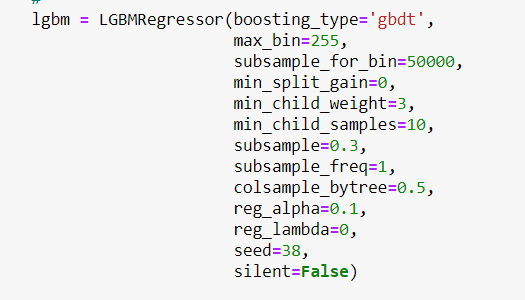
    
6)Выбросы в таргетах удалять мы должны)А вот удалять строки где таргет норм, а чего-то не хватает стоит только в крайнем случае.
    
7)Перед обучением выведи фичи и таргет. У тебя совпадают индексы? 
    
Про "за какие деньги народ продает") Это конечно да, но у нас сервис должен предоставлять адекватную оценку, а не подстраиваться под "я люблю это машину, поэтому меньше чем за лям не отдам")
    
Когда у тебя дедлайн? Давай сделаем так, если он уже подгорает, напиши мне просто после выводов базовую модель очищенную от выбросов, как писал тебе алгоритм, уверен что не выставляя кучу параметров она тебе даст решение в районе 2500. Если дедлайн терпит, доработай данную работу, но пожалуйста в отдельном блокноте, здесь уже путаница идёт, и пришли мне через Валерию)Вроде ответил на всё)Если что, напиши вопрос еще раз)
    
P.S. Обязательно посмотри индексы таргетов и фичей, если не совпадают, найди почему и исправь)
</div>

<div class="alert alert-block alert-info">
Приветсвую)
    
**Последняя версия v_4 доработки**

Лишнюю графику отключил
    
5) В задании написано:
    
    Поскольку модель градиентного бустинга может обучаться долго, измените у неё только два-три параметра.
    
Я в GridSearch перебирал 4:
    
    'learning_rate': [i for i in [0.008, 0.05]],
        
    'n_estimators': [i for i in [100, 1000]],
        
    'max_depth': [i for i in range(2, 4, 1)],
        
    'num_leaves': [i for i in [50, 100]]

Остальные руками менял хотя бы по разу и смотрел вообще что-то меняется или нет.

6) Где таргет норм я не удалял. В предобработке я удалили выбросы по алгоритму:
    
    display(dfp['price'].quantile([.05, 0.85]))
    
    Есть 8234 записи с нулевой ценой. Они нам точно не нужны для моделирования. Также цена авто ниже 350евро кажется нецелесообразной для моделирования.
    
    #ограничиваем цену сверху 85% квантилем
    dfp = dfp.query('9000 >= price >= 350')
    
Считаю данную предобработку в приницпе адекватной поставленной задаче. В боевых условиях я наверное бы попробовал просто разбить цену на страты и прогнозить в каждой страте отдельно. Так в машинах до 1000 евро и 200 огромная погрешность 20%. А в машинах 20тыс евро и 3 тыс не так много 15%
    
7) Я честно не понял почему работа не принята с комментами желтыми как ответы на вопросы). Так как я переделал всю работу с фичами, убрал выбросы из price и получил как требовалось 
    
**RMSE LGBMRegressor 2158**)
    
RMSE Liner 2303)
    
Просто оставил вопрос, что не сталкивался еще за время обучения с таким поведением моделей с датасетом, что как ни крути пока в таргете выбросы не удалишь совсем криво прогнозят.
    
    **Дедлайн не терпит совсем**. Так как у меня следующий спринт "Временные ряды" длиной в неделю до 23.05 и теория и проект - первый раз так. В итоге сегодня последний день мягкого дедлайна по спринту, а к проекту "Временные ряды" у меня нет доступа, так как текущий не принят.
    
8) Проверил индексы таргетов и фичей и нашел большую ошибку прошлой доработки. Когда я исправлял кодирование только категориальных побил индексы. После исправления RMSE понизился значительно. Теперь дажн если вообще не удалять выбросы по таргету то RMSE LGBM 2018 что совсем неплохо.
**Огромное спасибо за помощь**

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_4**
    
Так)ну всё кроме 7 Ок)А про 7, я хотел убедиться, что ты полностью разобрался и избавился от всех вопросов)Если это так)Работу принимаю)Если что пиши через куратора)Спасибо за работу!)
</div>

In [ ]:
#построим heatmap
#plt.figure(figsize=(15, 10))
#sns.heatmap(dfp.corr())

features = dfp.drop(['price'], axis=1)
target = dfp['price']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

categorical = features.select_dtypes(
    include='object').columns.to_list()
print('Категориальные поля:', categorical)
numeric = features.select_dtypes(
    include='number').columns.to_list()
print('Числовые поля:', numeric)

#проведем масштабирование признаков
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 

#закодируем категориальные переменные
#при этом OrdinalEncoder возвращает тип array
#оставим структуру DataFrame Pandas
encoder = OrdinalEncoder()
features_train[categorical] = encoder.fit_transform(features_train[categorical])
features_valid[categorical] = encoder.fit_transform(features_valid[categorical])

display(features_train)
display(target_train)

### LGBMRegressor

In [ ]:
%%time
#LGBM чтобы не усложнять указанием колонок с префиксом name:
#работает с типом категориальных переменных "category" вместо "object"
for i in range(len(categorical)):
    features_train[categorical[i]] = features_train[categorical[i]].astype(
        "category")
    features_valid[categorical[i]] = features_valid[categorical[i]].astype(
        "category")

local_machine = False

if local_machine:
    params_lgbm = {
        'learning_rate': [i for i in [0.008, 0.05]],
        'n_estimators': [i for i in [100, 1000]],
        'max_depth': [i for i in range(2, 4, 1)],
        'num_leaves': [i for i in [50, 100]]
    }

    #применим KFold с shuffle, вместо простого указания кол-ва выборок кроссвалидации
    kf = KFold(n_splits=3, shuffle=True, random_state=12345)
    #
    lgbm = LGBMRegressor(boosting_type='gbdt',
                         max_bin=255,
                         subsample_for_bin=50000,
                         min_split_gain=0,
                         min_child_weight=3,
                         min_child_samples=10,
                         subsample=0.3,
                         subsample_freq=1,
                         colsample_bytree=0.5,
                         reg_alpha=0.1,
                         reg_lambda=0,
                         seed=38,
                         silent=False)

    grid_lgbm = GridSearchCV(estimator=lgbm,
                             param_grid=params_lgbm,
                             cv=kf,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1)
    grid_lgbm.fit(features_train, target_train, verbose=0)
    print(
    "RMSE на валидационной выборке: ",
    mean_squared_error(
        target_valid, grid_lgbm.best_estimator_.predict(features_valid))**(.5))
    print(grid_lgbm.best_params_)
else:
    lgbm = LGBMRegressor(boosting_type='gbdt',
                         learning_rate = 0.05,
                         max_depth = 3,
                         n_estimators = 1000,
                         num_leaves = 100,
                         max_bin=255,
                         subsample_for_bin=50000,
                         min_split_gain=0.1,
                         min_child_weight=3,
                         min_child_samples=10,
                         min_data_in_leaf=10,
                         subsample=0.3,
                         subsample_freq=1,
                         colsample_bytree=0.5,
                         reg_alpha=0.1,
                         reg_lambda=0,
                         seed=38,
                         silent=False,
                         random_state=12345)
    lgbm.fit(features_train, target_train, verbose=0)
    print(
    "RMSE на валидационной выборке: ",
    mean_squared_error(
        target_valid, lgbm.predict(features_valid))**(.5))


RMSE на валидационной выборке:  1232.1084175837748

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
За kfold сразу лайк)Молодец) Пожалуйста подбери гиперпараметры локально, и обучи только на них, т.к. сервера умирают)
</div>

### Linear Regresssion

In [ ]:
%%time

LinearReg = LinearRegression(normalize=True)
LinearReg.fit(features_train, target_train);

In [ ]:
%%time
LR_predict = LinearReg.predict(features_valid)
mean_squared_error(target_valid, LR_predict)**(.5)

### Lasso

In [ ]:
%%time
lasso = Lasso(normalize=True)
lasso.fit(features_train, target_train);

In [ ]:
%%time
lasso_predict = lasso.predict(features_valid)
mean_squared_error(target_valid, lasso_predict)**(.5)

### Ridge

In [ ]:
%%time

ridge = Ridge(normalize=True)
ridge.fit(features_train, target_train);

In [ ]:
%%time
ridge_predict = ridge.predict(features_valid)
mean_squared_error(target_valid, ridge_predict)**(.5)

## Анализ моделей

**Итоговый вывод:**  Градиентый бустинг с перебором гипермаркетов через GridSearch обучается дольше 3.96 s, и дает RMSE: 1232   
Быстрее всего обучается Linear Regresssion  6 ms при этом RMSE: 1771

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Пока подсказок не даю, но чтобы я мог принять проект результат на тесте должен быть не больше 2500)Если будут трудности пиши вопросы, я отвечу и сделаю подсказку)Сразу подсказывать не хочу, т.к. знания добытые самостоятельно гораздо больше стоят)Жду доработок)
</div>

<div class="alert alert-block alert-info">
    
v_4. Все доработал. **Итоговый вывод:**  Градиентый бустинг с перебором гипермаркетов через GridSearch обучается дольше 3.96 s, и дает RMSE: 1232   
Быстрее всего обучается Linear Regresssion  6 ms при этом RMSE: 1771
    
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей